## One New Album A Day - 2021 Edition

I decided to listen to one new album a day in 2021. This whole pandemic thing was getting tedious, and I needed a funky personal project to spice things up. So, I decided to challenge my ears, my sensibilites, and my sanity and listen to a new album every day. 

### The project
One of my aims was to diversify my taste and find hidden gems I might have never heard had I not sought them out. Below I'm going to take a look at the statistics of the albums I did listen to, and maybe even run a couple of analyses on their Spotify data (though I stream on Apple Music.)

In [201]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("Documents/albums.csv")

## Mapping Diversity
### Genre diversity

In [3]:
print(df.head())

        Date                                              Album  \
0  January 1  Presenting the Fabulous Ronettes Featuring Ver...   
1  January 2                          Heaven To a Tortured Mind   
2  January 3                               After Hours (Deluxe)   
3  January 4                                         Inner Song   
4  January 5                                    Lianne La Havas   

            Artist    Recommender  Description Language  \
0     The Ronettes            Mom          Pop  English   
1       Yves Tumor  Mic the Snare      Alt pop  English   
2       The Weeknd            NaN     R&B/Soul  English   
3  Kelly Lee Owens  Mic the Snare  Electronica  English   
4  Lianne La Havas  Mic the Snare     R&B/Soul  English   

                                              Review Country  Year  
0  Everything you could want from a 60s girl grou...      US  1964  
1                                              *****      US  2020  
2                                  

Text(0.5, 1.0, 'Genre Diversity')

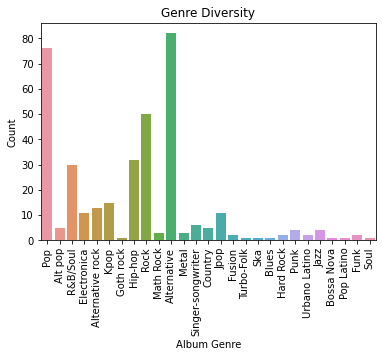

In [174]:
# We love graphs don't we folks

ax = sns.countplot(x="Description", data=df)
plt.ylabel('Count')
plt.xlabel('Album Genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Genre Diversity")

Text(0.5, 1.0, 'Genre Diversity by Release Year')

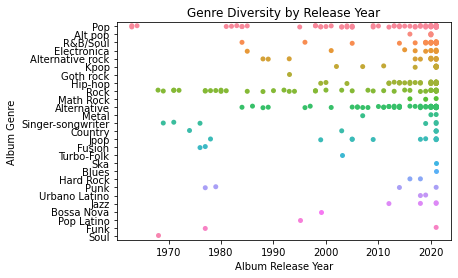

In [175]:
# More!

ax = sns.stripplot(x="Year", y="Description", data=df)
plt.ylabel('Album Genre')
plt.xlabel('Album Release Year')
plt.title("Genre Diversity by Release Year")


### Geographic diversity
Okay but *where* were the albums made?

In [165]:
import pycountry

unique = df['Country'].value_counts()
df2 = pd.DataFrame(unique)

d = {'CODE': ['USA', 'GBR', 'JPN', 'KOR', 'CAN', 'FRA', 'AUS', 'SWE', 'COL', 'IND', 'PSE', 'LBN', 'BRA', 'RUS', 'PRI', 'ITA', 'NOR', 'ESP','IRL', 'ISR', 'MYS', 'THA', 'DEU', 'NZL', 'CHN', 'HKG', 'TWN', 'SRB', 'COL', 'MAR', 'DNK', 'NLD', 'MEX', 'ARM', 'GRC', 'ARG', 'NER'], 'COUNT': [169,64,36,15,12,8,8,5,4,4,3,3,3,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}
df2 = pd.DataFrame(d)

In [164]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = df2['CODE'],
    z = df2['COUNT'],
    colorscale = 'Purpor',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='white',
    marker_line_width=0.2,
    colorbar_title = '# of Albums',
))

fig.update_layout(
    title_text='Geographic diversity of albums listened to in 2021',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="natural earth"
    ),
    annotations = [dict(
        x=0.5,
        y=0.1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

### Linguistic diversity
What languages were the albums in?

Text(0.5, 1.0, 'Linguistic Diversity')

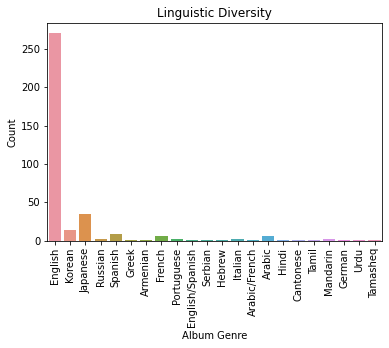

In [191]:
# Graph attack!

ax = sns.countplot(x="Language", data=df)
plt.ylabel('Count')
plt.xlabel('Album Genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Linguistic Diversity")